# Regression

Regression attempts to fit a function model to training data. Let's create a data set from a function, here $f = 3x^3 - 2x$, and add some Gaussian noise with standard deviation `sigma`:

In [1]:
import numpy as np

def generate_data(X, f=lambda x: 3*x**3 - 2*x, sigma=0.1):
    y = f(X) + np.random.normal(scale=sigma, size=X.shape)
    return y

X = np.linspace(-1,1,9)
y = generate_data(X)

X_test = np.linspace(-1, 1, 41)
y_test = generate_data(X_test, sigma=0.0)

### Visualize data

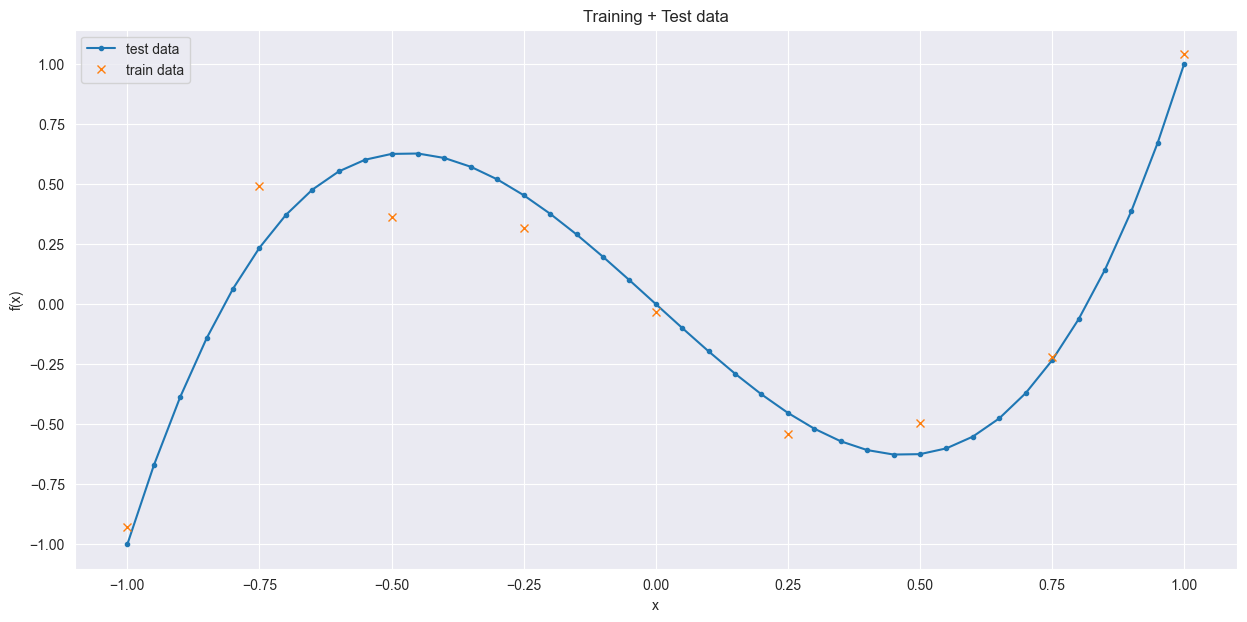

In [2]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

plt.figure(figsize=(15, 7))
plt.title("Training + Test data")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(X_test, y_test, ".-", label="test data")
plt.plot(X, y, 'x', label="train data")
plt.legend()
plt.show()

## Task 1: Polynomial function fitting

Augment the following code snippet to actually compute the nonlinear regression given the first $1..M$ training data points and considering a polynomial model of degree $P \in \{0..8\}$.  
What do you expect as optimal parameter values $w_0$ to $w_3$ for a polynomial model of degree $P=3$?

An optimal model for the parameter values $w_0$ to $w_3$ for a polynomial model would be that each $w$ represents a degree. For instance when looking at the function: $f = 4x^3+2x^2+x$ the values of $w_i$ would consist of: $w_3 = 4$, $w_2 = 2$, $w_1 = 2$, $w_0 = 0$

In [4]:
class Regression:
    def __init__(self, alpha=0.0):
        self.w = np.zeros(0)
        self.alpha = alpha

    def predict(self, X):  # apply prediction model to data X
        return np.dot(X, self.w)
    def fit(self, X, y):  # TODO: compute optimal weights for training data (X,y)
        #From the lecture notes (X^t X)^-1 X^t y
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [6]:
from matplotlib import pyplot as plt
from ipywidgets import interact

# @interact makes the following function (update) interactive, with sliders for M and P
@interact(M=(1, len(X)), P=(0, 8))
def update(M=len(X), P=3):
    def design_matrix(X):  # compute polynomial features
        return np.power(np.transpose([X]), range(0, P+1))

    # train regression model
    reg = Regression()
    reg.fit(design_matrix(X[0:M]), y[0:M])  # fit the first M training points only
    print('w: ', reg.w)

    plt.figure(42, figsize=(15,7))
    plt.plot(X_test, y_test, '.-', label="test data")  # plot ground truth of test data
    plt.plot(X_test, reg.predict(design_matrix(X_test)), 'r-', label="prediction")  # plot model prediction on test data
    plt.scatter(X[0:M], y[0:M], marker='x', label="train data") # plot training data
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=9, description='M', max=9, min=1), IntSlider(value=3, description='P', m…

## Task 2

Explain, what is learned in the following situations:

1. $M=9$, $P=0$
2. $M=4$, $P=3$
3. $M=9$, $P=8$

Lets start with the first case $M = 9$, $P = 0$:

w:  [-0.00095359]


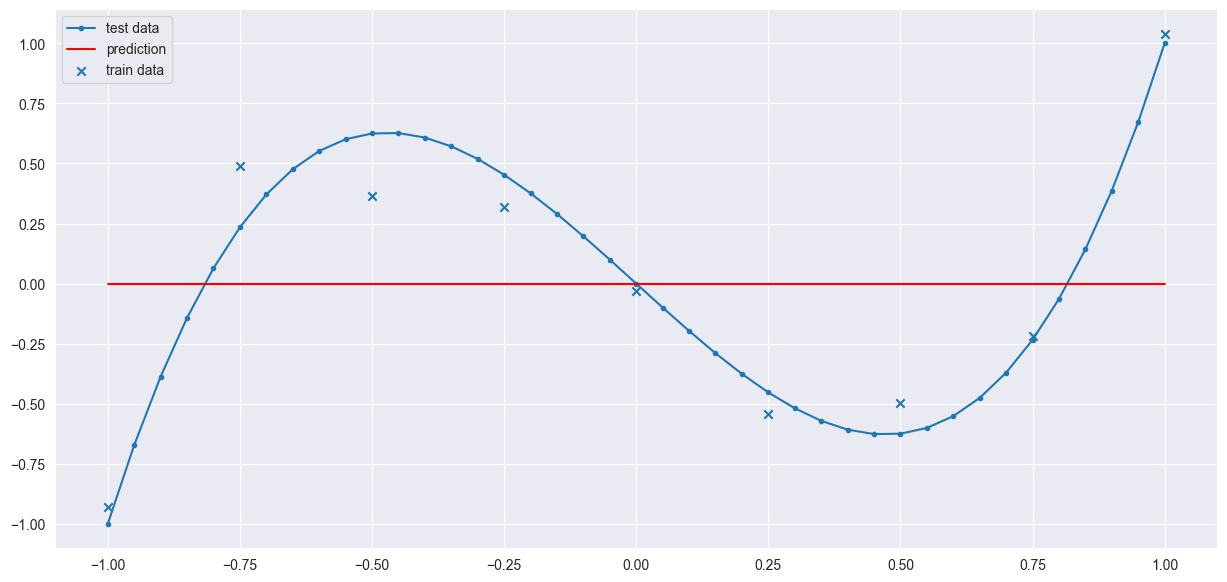

In [7]:
update(9, 0)

It can be seen, that the Polynomial Degree is 0 which is a line. This prediction is underfitting the actual data due to the low degree. All 9 train data points are being used which will give us a Linear Regression line. This model is not great and performs poorly!

Second case: $M = 4$, $P = 3$

w:  [ 1.97940727 12.23762134 26.68999708 17.36116693]


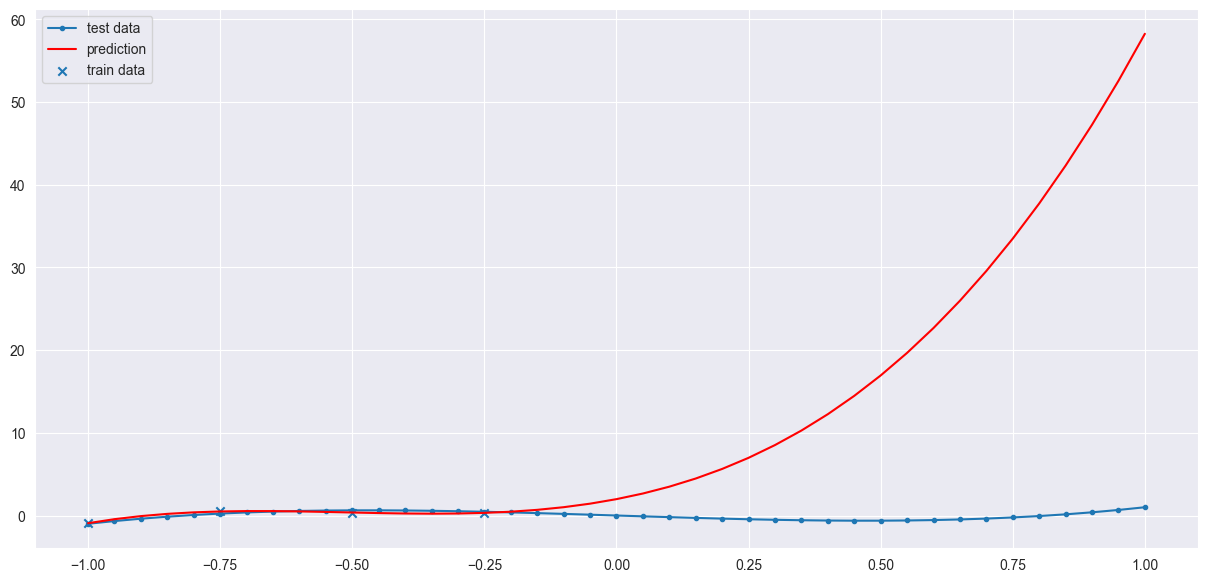

In [8]:
update(4, 3)

This prediction starts off great. Its polynomial degree is neither overfitting nor underfitting. The problem is that there is not enough train data. The Prediction line performs poorly once it reaches an area where there was no train data. Increasing the amount of train data would make it a useable model.

Case 3: $P = 9$, $P = 8$

w:  [ -0.0312334   -2.19471458  -1.89526387   8.576751    10.54083349
 -15.47338206 -15.9962875   10.0760581    7.43727983]


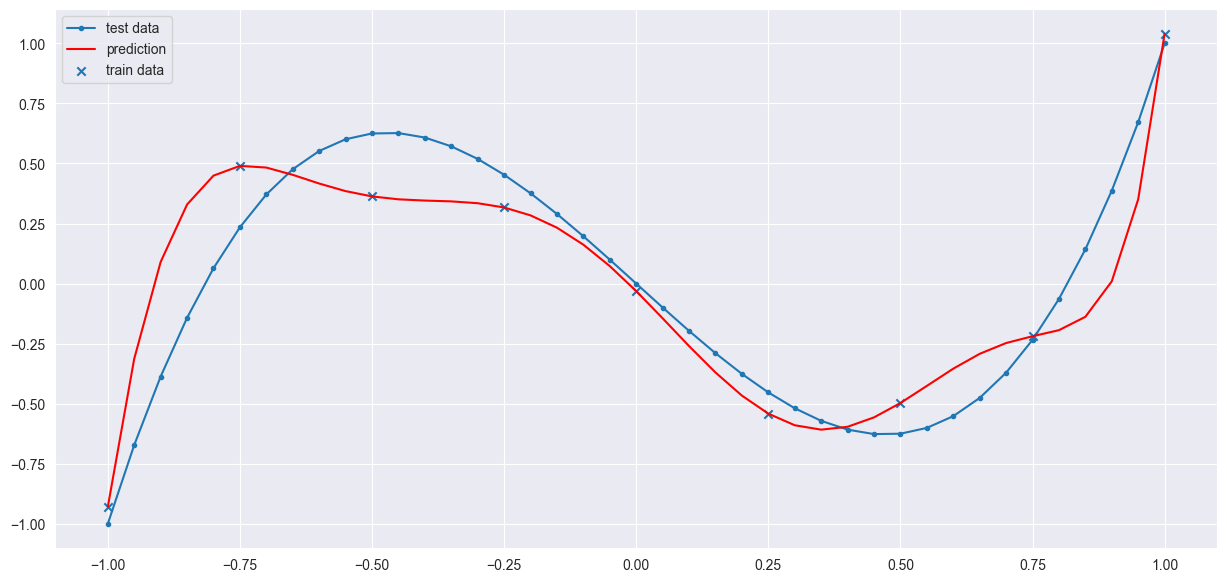

In [9]:
update(9, 8)

This model does include all test points that were given but there a polynomial Degree of 9 is overkill. It results into an overfit of the prediction points and this forges the prediction.

## Task 3: Ridge Regression

To improve the smoothness of the learned function model, we can use Ridge regression, which adds a regularization term to our cost function:

${\cal L} = \frac{1}{M} \|\hat{\mathbf y} - \mathbf y\|^2 + \lambda \|\mathbf w\|^2$

Show and verify step by step that the minimization of this loss functions yields the learning rule of Ridge regression:

$\mathbf w^* = (\mathbf X^t \mathbf X + \lambda \mathbf 1)^{-1} \mathbf X^t \mathbf y$

_Hint_: See [_The Matrix Cookbook_ (Petersen and Pedersen, 2012)](http://www2.imm.dtu.dk/pubdb/edoc/imm3274.pdf), for derivatives (section 2.4), norms (section 10.3) and other identities of vectors and matrices.

Extend your implementation to perform Ridge regression.  
Introduce $\lambda$ as a new parameter `alpha` to your `update` function and determine a suitable value for the case $P=8, M=9$ from task 2.  
Explain what happens for very large and very small values of $\lambda$.

#### Ableitung der Verlustfunktion berechnen:
$\frac{\partial L}{\partial w}$ = $\frac{\partial }{\partial w}$ [$\frac{1}{M} \|\hat{\mathbf y} - \mathbf y\|^T + \lambda \|\mathbf w\|^2$]

In [26]:
from sklearn.linear_model import Ridge

# @interact makes the following function (update) interactive, with sliders for M and P
@interact(M=(1, len(X)), P=(0, 8), alpha=(-5, 5, 0.2))
def update(M=len(X), P=8, alpha=-2.0):
    def design_matrix(X):  # compute polynomial features
        return np.power(np.transpose([X]), range(0, P+1))

    # train regression model
    ridge = Ridge(alpha=5**alpha)
    ridge.fit(design_matrix(X[0:M]), y[0:M])  # fit the first M training points only

    plt.figure(42, figsize=(15,7))
    plt.plot(X_test, y_test, '.-', label="test data")  # plot ground truth of test data
    plt.plot(X_test, ridge.predict(design_matrix(X_test)), 'r-', label="prediction")  # plot model prediction on test data
    plt.scatter(X[0:M], y[0:M], marker='x', label="train data") # plot training data
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=9, description='M', max=9, min=1), IntSlider(value=8, description='P', m…

A suitable $\lambda$ for $P = 8$ and $M = 9$ would be around -2 since the curve accepts the train points more naturally and doesn't go right through them. It doesn't look like an overfit like it would with $\lambda$ = -5 or an underfit like $\lambda$ = 2.

The higher the $\lambda$ the more the model prediction underfits and the lower the $\lambda$ the more the prediction overfits!

## Task 4: LASSO

Instead of using the L2 norm, i.e. the _squared_ Euclidean norm $\|\mathbf w\|_2^2 = \sum w_i^2$, one can also use the L1 norm, i.e. $\|\mathbf w\|_1 = \sum |w_i|$, as a regularization term.  
This results in LASSO regression (_least absolute shrinkage and selection operator_).

1. Replace your `Regression` instance with the [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) regressor from [scikit-learn](https://scikit-learn.org):  
   ```python
   from sklearn.linear_model import Lasso
   ```  
   Compare the resulting weight vectors with those from Ridge regression. What do you observe?

2. Determine and sketch the derivatives of both norms w.r.t. $\mathbf w$.  
   What are the advantages and disadvantages of both regularization terms?

In [28]:
from sklearn.linear_model import Lasso

# @interact makes the following function (update) interactive, with sliders for M and P
@interact(M=(1, len(X)), P=(0, 8), alpha=(-8, 8, 0.2))
def update(M=len(X), P=8, alpha=-2.0):
    def design_matrix(X):  # compute polynomial features
        return np.power(np.transpose([X]), range(0, P+1))

    # train regression model
    las = Lasso(alpha=5**alpha)
    las.fit(design_matrix(X[0:M]), y[0:M])  # fit the first M training points only

    plt.figure(42, figsize=(15,7))
    plt.plot(X_test, y_test, '.-', label="test data")  # plot ground truth of test data
    plt.plot(X_test, las.predict(design_matrix(X_test)), 'r-', label="prediction")  # plot model prediction on test data
    plt.scatter(X[0:M], y[0:M], marker='x', label="train data") # plot training data
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=9, description='M', max=9, min=1), IntSlider(value=8, description='P', m…

The weight factor of the Lasso shifts a little from the Ridge Regression model. A good value for $M = 9$ and $P = 8$ tends to be $\lambda$ = -4 and the model underfits at a smaller $\lambda$. 
The weights for Lasso are much stronger for > 0 values. 